In [1]:
from FaceLoader import FaceLoader
from SocialProcessor import SocialProcessor
import cv2
import numpy as np
from matplotlib.pyplot import imshow
from keras.models import load_model
import keras.backend.tensorflow_backend as tb
import os
tb._SYMBOLIC_SCOPE.value = True
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import mysql.connector

from IPython.display import Image


%matplotlib inline

Using TensorFlow backend.


In [2]:
url = "./IMG_6874.JPG"
loader = FaceLoader(url)

In [3]:
loader.local_url

'./tmp/880cfbf35e858275f41d8ce14b0e21e1.JPG'

In [4]:
ind = 0

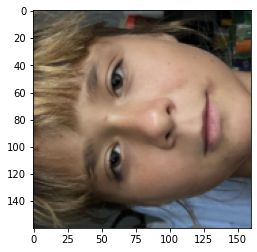

In [5]:
images = loader.load_and_align_image()
imshow(images[ind])

In [6]:
model_path = 'keras-facenet-master/model/keras/model/facenet_keras.h5'
model = load_model(model_path)

/Users/aleksandrdremov/anaconda3/envs/FaceScrape/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
embs = loader.calc_embs(model=model, images=images)

In [8]:
conn = mysql.connector.connect(user='face', host="localhost", password="Hr3mI3PM5JlFWrub", database='global_scrape', port=8889, collation="utf8mb4_general_ci")

In [9]:
processor = SocialProcessor(conn, model)

In [10]:
matches = processor.findMatches(embs[ind], batch=1000, threshold=1)

In [11]:
print(len(matches))

625


In [16]:
match_ind = 2
print(matches[match_ind][-1])
print("https://vk.com/id"+matches[match_ind][-4])
print(matches[match_ind][0])
Image(filename='./fragments/' + matches[match_ind][-2] + '.png')

0.7756331394178437
https://vk.com/id9306934
https://sun3-13.userapi.com/b3cVtKu0c7jKdT4sVacK2ew6PffPLYvDDV7aXg/5RWVY8u2VPQ.jpg


FileNotFoundError: [Errno 2] No such file or directory: './fragments/36610e22-3cfd-4dd1-a63e-1867f303b3c2.png'